# KAUIL: Clasificador de riesgo de incendios forestales

## Librerías

In [77]:
# Data reading
import pandas as pd
import numpy as np
import warnings

# Data viz
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Machine learning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

import pickle
# COnfigurations
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

## Lectura de datos

In [78]:
filename = "Datos/Firegrowth_groups_v1_01.csv"
df = pd.read_csv(filename)

In [79]:
df

,ID,DOB,year,fireday,firearea,ecozone,fwi,isi,ffmc,dmc,dc,bui,prec,tmax,vpd,ws,rh,fwi_prev1,fwi_prev2,rh_prev1,rh_prev2,d_fwi,d_isi,d_ffmc,d_dmc,d_dc,d_bui,d_prec,d_vpd,d_tmax,d_ws,d_rh,Biomass,Closure,prcC,prcD,peatCl,peatProb,hydrodens2k,hydrodens5k,hydrodens10k,hydrodens25k,roaddens2k,roaddens5k,roaddens10k,roaddens25k,roaddist,nonfuel1k,nonfuel2k,nonfuel5k,nonfuel10k,dem,slope,twi,aspect,cumuarea,pctgrowth,prevgrow,sprdistm,lon,lat
0,2002_109,175,2002,1,7565.40,9.00,17.96,6.00,86.71,49.38,267.73,67.56,2.01,27.76,25.69,15.91,27.62,22.90,25.53,32.85,30.03,12.22,3.34,15.94,28.94,114.11,38.87,-0.94,12.94,8.51,6.43,-24.60,99.67,63.49,87.09,12.91,0,25.06,0.02,0.03,0.04,0.03,0.00,0.00,0.02,0.05,6642.02,0.01,0.01,0.02,0.03,700.15,1.26,5.88,215.32,7565.40,0.00,0.00,9814.56,-116.44,56.82
1,2002_109,176,2002,2,0.00,9.00,23.75,8.46,90.03,52.75,278.41,71.59,0.00,23.07,21.80,13.41,34.60,17.34,23.00,27.42,32.62,18.48,5.99,21.84,32.90,121.50,43.35,-2.98,12.69,3.73,5.01,-19.78,99.14,62.49,89.84,10.16,0,16.48,0.06,0.08,0.05,0.04,0.00,0.00,0.02,0.03,7377.87,0.02,0.04,0.05,0.04,689.07,1.11,5.86,176.32,9707.04,0.00,7565.40,0.00,-116.47,56.81
2,2002_109,177,2002,3,2141.64,9.00,31.20,11.94,91.93,57.87,286.68,76.92,0.00,25.50,23.34,14.86,30.87,23.75,17.34,34.60,27.42,25.70,9.41,22.02,37.74,127.13,48.26,-2.70,10.96,5.99,5.98,-22.79,99.14,62.49,89.84,10.16,0,16.48,0.06,0.08,0.05,0.04,0.00,0.00,0.02,0.03,7377.87,0.02,0.04,0.05,0.04,689.07,1.11,5.86,176.32,9707.04,28.31,7565.40,1302.71,-116.47,56.81
3,2002_109,178,2002,4,51.84,9.00,31.57,11.35,92.06,64.63,303.35,84.34,0.00,28.12,27.39,13.52,34.90,31.80,24.55,30.60,33.93,25.15,8.50,18.09,42.66,133.91,53.16,-2.34,14.47,8.44,3.96,-16.52,94.64,62.74,94.77,5.23,0,36.31,0.01,0.07,0.07,0.03,0.00,0.00,0.00,0.01,9916.62,0.00,0.00,0.04,0.05,657.11,1.49,5.88,148.77,9758.88,0.53,2141.64,29.65,-116.61,56.80
4,2002_109,179,2002,5,74.52,9.00,23.57,7.39,90.78,65.28,301.58,84.71,0.35,25.74,25.32,8.59,42.54,30.94,31.14,35.42,30.91,18.00,4.87,18.49,44.17,135.36,54.71,-2.15,12.18,6.16,0.21,-13.39,116.49,67.58,93.25,6.75,0,31.39,0.01,0.06,0.06,0.04,0.00,0.00,0.00,0.02,10244.83,0.00,0.00,0.04,0.04,685.98,1.52,5.74,194.18,9833.40,0.76,51.84,42.48,-116.46,56.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70890,2021_9,221,2021,17,0.00,4.00,5.77,1.18,66.92,62.92,513.77,96.35,1.62,12.56,7.89,14.64,89.55,12.34,15.68,48.45,54.74,-3.09,-2.09,-10.40,33.25,145.60,49.27,0.40,12.22,-6.68,3.88,36.01,28.86,45.82,81.78,18.22,0,45.50,0.02,0.02,0.06,0.10,0.00,0.00,0.00,0.01,8733.50,0.01,0.02,0.02,0.14,199.39,0.95,6.53,70.76,6894.72,0.00,304.56,0.00,-116.74,63.10
70891,2021_9,222,2021,18,0.00,4.00,1.80,0.58,57.28,42.53,499.47,70.14,4.96,14.37,4.88,10.59,54.40,5.77,12.34,89.55,48.45,-7.44,-2.77,-19.63,12.66,128.46,22.75,3.52,13.66,-5.78,-0.48,-2.50,28.86,45.82,81.78,18.22,0,45.50,0.02,0.02,0.06,0.10,0.00,0.00,0.00,0.01,8733.50,0.01,0.02,0.02,0.14,199.39,0.95,6.53,70.76,6894.72,0.00,0.00,0.00,-116.74,63.10
70892,2021_9,223,2021,19,0.00,4.00,5.80,1.47,76.29,44.15,505.08,72.47,0.29,14.12,8.51,11.36,49.77,1.80,5.77,54.40,89.55,-3.24,-1.78,-1.43,13.96,129.98,24.63,-0.89,13.14,-6.12,1.05,-6.33,28.86,45.82,81.78,18.22,0,45.50,0.02,0.02,0.06,0.10,0.00,0.00,0.00,0.01,8733.50,0.01,0.02,0.02,0.14,199.39,0.95,6.53,70.76,6894.72,0.00,0.00,0.00,-116.74,63.10
70893,2021_9,224,2021,20,0.00,4.00,8.40,2.15,82.20,45.77,511.25,74.80,0.54,15.73,9.85,7.66,57.85,5.80,1.80,49.77,54.40,0.24,-0.81,8.67,16.62,138.50,28.68,-2.19,12.79,-4.07,-3.45,-1.48,28.86,45.82,81.78,18.22,0,45.50,0.02,0.02,0.06,0.10,0.00,0.00,0.00,0.01,8733.50,0.01,0.02,0.02,0.14,199.39,0.95,6.53,70.76,6894.72,0.00,0.00,0.00,-116.74,63.10


## Funciones útiles

In [80]:
# Función para sacar nulos detalladamente
def missing_zero_values_table(df):
    zero_val = (df == 0.00).astype(int).sum(axis=0)
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
    mz_table = mz_table.rename(columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
    mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
    mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
    mz_table['Data Type'] = df.dtypes
    mz_table = mz_table[mz_table.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) +
    " Rows\n" "There are " + str(mz_table.shape[0]) +" columns that have missing values.")
    return mz_table

In [81]:
# Función para sacar estadísticas de datos discretos
def freq_discrete(df, feature):
    freq = df[feature].value_counts().to_frame().reset_index()  # Reset index to make 'ecozone' a column
    freq.columns = [feature, "Frequency"]   # Rename the columns to 'ecozone' and 'frequency'
    freq["Percent"] = (freq["Frequency"] / freq["Frequency"].sum())
    freq["Acumulative_frequency"] = freq["Frequency"].cumsum()
    freq["Acumulative_percent"] = freq["Percent"].cumsum()
    freq["Frequency"] = freq["Frequency"].map(lambda x: "{:,.0f}".format(x))
    freq["Percent"] = freq["Percent"].map(lambda x: "{:,.2%}".format(x))
    freq["Acumulative_frequency"] = freq["Acumulative_frequency"].map(lambda x: "{:,.0f}".format(x))
    freq["Acumulative_percent"] = freq["Acumulative_percent"].map(lambda x: "{:,.2%}".format(x))
    return freq

### Data Viz

In [82]:
def get_seasonal_data(df):

    # Add temporal features
    df['season'] = df['DOB'].apply(lambda x:
        'Winter' if x >= 335 or x <= 59 else
        'Spring' if 60 <= x <= 151 else
        'Summer' if 152 <= x <= 243 else 'Fall'
    )

    df['month'] = ((df['DOB'] - 1) // 30 + 1).clip(1, 12)
    return df

In [83]:
def plot_seasonal_patterns(df):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))

    # 1. Average Fire Area by Season
    seasonal_avg = df.groupby('season')['firearea'].mean().reindex(['Winter', 'Spring', 'Summer', 'Fall'])
    sns.barplot(x=seasonal_avg.index, y=seasonal_avg.values, ax=ax1)
    ax1.set_title('Average Fire Area by Season')
    ax1.set_ylabel('Average Fire Area (ha)')

    # 2. Monthly Progression
    monthly_stats = df.groupby('month').agg({
        'firearea': 'mean',
        'fwi': 'mean',
        'tmax': 'mean'
    }).reset_index()

    ax2.plot(monthly_stats['month'], monthly_stats['firearea'], marker='o')
    ax2.set_title('Average Fire Area by Month')
    ax2.set_xlabel('Month')
    ax2.set_ylabel('Average Fire Area (ha)')

    # 3. Fire Weather Index by Season and Ecozone
    sns.boxplot(x='season', y='fwi', hue='ecozone', data=df, ax=ax3)
    ax3.set_title('FWI Distribution by Season and Ecozone')
    ax3.legend(title='Ecozone', bbox_to_anchor=(1.05, 1))

    # 4. Temperature vs Fire Area by Season
    colors = {'Winter': 'blue', 'Spring': 'green', 'Summer': 'red', 'Fall': 'orange'}
    for season in colors:
        season_data = df[df['season'] == season]
        ax4.scatter(season_data['tmax'], season_data['firearea'],
                   alpha=0.5, c=colors[season], label=season)
    ax4.set_title('Temperature vs Fire Area by Season')
    ax4.set_xlabel('Maximum Temperature (°C)')
    ax4.set_ylabel('Fire Area (ha)')
    ax4.legend()

    plt.tight_layout()
    return fig


In [84]:
def plot_ecozone_patterns(df):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))

    # 1. Average Fire Area by Ecozone
    ecozone_avg = df.groupby('ecozone')['firearea'].mean().sort_values(ascending=False)
    sns.barplot(x=ecozone_avg.index, y=ecozone_avg.values, ax=ax1)
    ax1.set_title('Average Fire Area by Ecozone')
    ax1.set_ylabel('Average Fire Area (ha)')

    # 2. Ecozone Risk Levels
    risk_thresholds = df['firearea'].quantile([0.25, 0.75])
    df['risk_level'] = pd.cut(df['firearea'],
                             bins=[-np.inf, risk_thresholds[0.25], risk_thresholds[0.75], np.inf],
                             labels=['Low', 'Medium', 'High'])
    risk_by_ecozone = pd.crosstab(df['ecozone'], df['risk_level'], normalize='index') * 100
    risk_by_ecozone.plot(kind='bar', stacked=True, ax=ax2)
    ax2.set_title('Risk Level Distribution by Ecozone')
    ax2.set_ylabel('Percentage')

    # 3. Environmental Characteristics by Ecozone
    env_vars = ['dem', 'slope', 'Biomass']
    env_data = df.groupby('ecozone')[env_vars].mean()
    env_data_scaled = StandardScaler().fit_transform(env_data)
    env_data_scaled = pd.DataFrame(env_data_scaled,
                                 columns=env_vars,
                                 index=env_data.index)
    env_data_scaled.plot(kind='bar', ax=ax3)
    ax3.set_title('Standardized Environmental Characteristics by Ecozone')
    ax3.legend(bbox_to_anchor=(1.05, 1))

    # 4. FWI vs Fire Area by Ecozone
    for ecozone in df['ecozone'].unique():
        ecozone_data = df[df['ecozone'] == ecozone]
        ax4.scatter(ecozone_data['fwi'], ecozone_data['firearea'],
                   alpha=0.5, label=f'Ecozone {ecozone}')
    ax4.set_title('FWI vs Fire Area by Ecozone')
    ax4.set_xlabel('Fire Weather Index')
    ax4.set_ylabel('Fire Area (ha)')
    ax4.legend(bbox_to_anchor=(1.05, 1))

    plt.tight_layout()
    return fig

In [85]:
# 3. Environmental Factors Analysis
def create_environmental_plot():
    fig = make_subplots(rows=2, cols=2,
                       subplot_titles=('Biomass vs Fire Area',
                                     'Crown Closure vs Fire Area',
                                     'Conifer % vs Fire Area',
                                     'Elevation vs Fire Area'))

    # Biomass
    fig.add_trace(
        go.Scatter(x=df['Biomass'], y=df['firearea'], mode='markers',
                  opacity=0.5, name='Biomass'),
        row=1, col=1
    )

    # Crown Closure
    fig.add_trace(
        go.Scatter(x=df['Closure'], y=df['firearea'], mode='markers',
                  opacity=0.5, name='Closure'),
        row=1, col=2
    )

    # Conifer Percentage
    fig.add_trace(
        go.Scatter(x=df['prcC'], y=df['firearea'], mode='markers',
                  opacity=0.5, name='Conifer %'),
        row=2, col=1
    )

    # Elevation
    fig.add_trace(
        go.Scatter(x=df['dem'], y=df['firearea'], mode='markers',
                  opacity=0.5, name='Elevation'),
        row=2, col=2
    )

    fig.update_layout(height=1000, title_text="Environmental Factors Impact")
    return fig


In [86]:
# 4. Topographic Analysis
def create_topographic_plot():
    fig = make_subplots(rows=2, cols=2,
                       subplot_titles=('Slope Distribution',
                                     'TWI Distribution',
                                     'Aspect vs Fire Area',
                                     'Road Distance vs Fire Area'))

    # Slope distribution
    fig.add_trace(
        go.Histogram(x=df['slope'], name='Slope'),
        row=1, col=1
    )

    # TWI distribution
    fig.add_trace(
        go.Histogram(x=df['twi'], name='TWI'),
        row=1, col=2
    )

    # Aspect vs Fire Area
    fig.add_trace(
        go.Scatter(x=df['aspect'], y=df['firearea'], mode='markers',
                  opacity=0.5, name='Aspect'),
        row=2, col=1
    )

    # Road Distance vs Fire Area
    fig.add_trace(
        go.Scatter(x=df['roaddist'], y=df['firearea'], mode='markers',
                  opacity=0.5, name='Road Distance'),
        row=2, col=2
    )

    fig.update_layout(height=1000, title_text="Topographic Factors Analysis")
    return fig

## EDA

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70895 entries, 0 to 70894
Data columns (total 61 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            70895 non-null  object 
 1   DOB           70895 non-null  int64  
 2   year          70895 non-null  int64  
 3   fireday       70895 non-null  int64  
 4   firearea      70895 non-null  float64
 5   ecozone       70862 non-null  float64
 6   fwi           70042 non-null  float64
 7   isi           70132 non-null  float64
 8   ffmc          70132 non-null  float64
 9   dmc           70042 non-null  float64
 10  dc            70132 non-null  float64
 11  bui           70042 non-null  float64
 12  prec          70895 non-null  float64
 13  tmax          70895 non-null  float64
 14  vpd           70895 non-null  float64
 15  ws            70895 non-null  float64
 16  rh            70895 non-null  float64
 17  fwi_prev1     70011 non-null  float64
 18  fwi_prev2     69972 non-nu

In [88]:
# Mapeando datos discretos a datos reales
df['ecozone']= df['ecozone'].replace({1:"Arctic Cordillera",
                                      2:"Northern Arctic",
                                      3:"Southern Arctic",
                                      4:"Taiga Plains",
                                      5:"Taiga Shield West",
                                      6:"Boreal Shield West",
                                      7:"Atlantic Maritime",
                                      8:"Mixedwood Plains",
                                      9:"Boreal Plains",
                                      10:"Prairies",
                                      11:"Taiga Cordillera",
                                      12:"Boreal Cordillera",
                                      13:"Pacific Maritime",
                                      14:"Montane Cordillera",
                                      15:"Hudson Plains",
                                      25:"Taiga Shield East",
                                      26:"Boreal Shield East"})

df['peatCl']=df['peatCl'].replace({0:"No peatland",
                                   1:"Open bog",
                                  2:"Open poor fen",
                                  3:"Open rich fen",
                                  4:"Treed bog",
                                  5:"Treed poor fen",
                                  6:"Treed rich fen",
                                  7:"Forested bog",
                                  8:"Forested poor fen",
                                  9:"Forested rich fen"})


In [89]:
# Detalle continuo
pd.set_option('display.float_format', lambda x:'%.2f' %x) #quitamos la notacion cientifica
df.describe(percentiles=[0.01,0.05,0.25,0.5,0.75,0.95,0.99])

,DOB,year,fireday,firearea,fwi,isi,ffmc,dmc,dc,bui,prec,tmax,vpd,ws,rh,fwi_prev1,fwi_prev2,rh_prev1,rh_prev2,d_fwi,d_isi,d_ffmc,d_dmc,d_dc,d_bui,d_prec,d_vpd,d_tmax,d_ws,d_rh,Biomass,Closure,prcC,prcD,peatProb,hydrodens2k,hydrodens5k,hydrodens10k,hydrodens25k,roaddens2k,roaddens5k,roaddens10k,roaddens25k,roaddist,nonfuel1k,nonfuel2k,nonfuel5k,nonfuel10k,dem,slope,twi,aspect,cumuarea,pctgrowth,prevgrow,sprdistm,lon,lat
count,70895.00,70895.00,70895.00,70895.00,70042.00,70132.00,70132.00,70042.00,70132.00,70042.00,70895.00,70895.00,70895.00,70895.00,70895.00,70011.00,69972.00,70895.00,70895.00,70037.00,70132.00,70132.00,70037.00,70132.00,70037.00,70895.00,70895.00,70895.00,70895.00,70895.00,70895.00,70895.00,70895.00,70895.00,70886.00,70895.00,70895.00,70895.00,70895.00,70895.00,70895.00,70895.00,70895.00,70895.00,70895.00,70895.00,70895.00,70895.00,70895.00,70895.00,70895.00,70895.00,70895.00,70895.00,70895.00,70895.00,70895.00,70895.00
mean,204.17,2012.55,21.74,559.16,11.18,4.17,79.12,37.03,288.33,52.21,1.48,20.76,15.51,9.34,48.61,11.07,10.98,48.59,48.59,5.23,1.46,8.00,16.72,84.90,22.06,-0.99,8.88,2.08,0.11,-6.91,53.03,40.39,89.27,10.73,29.21,0.09,0.11,0.12,0.13,0.03,0.03,0.03,0.03,39504.42,0.18,0.19,0.19,0.18,559.58,5.07,5.61,182.71,14221.90,108.20,603.25,443.19,-111.92,57.73
std,28.11,5.69,20.76,2353.00,9.75,3.44,15.70,26.98,126.09,31.85,3.18,5.39,7.09,5.14,15.73,9.71,9.69,15.77,15.79,8.85,3.24,15.57,22.70,70.34,25.85,3.18,5.58,4.41,4.31,14.56,46.51,16.15,12.76,12.76,19.13,0.12,0.12,0.12,0.12,0.12,0.10,0.09,0.09,39581.99,0.22,0.20,0.18,0.16,391.60,6.47,0.47,47.65,39501.57,1876.13,2428.31,1042.33,15.72,4.58
min,30.00,2002.00,1.00,0.00,0.00,0.00,0.28,0.00,4.09,0.00,0.00,-18.49,0.03,0.04,11.41,0.00,0.00,11.41,11.41,-21.93,-6.76,-75.16,-54.53,-166.49,-59.08,-8.11,-19.97,-15.34,-19.39,-48.37,0.86,0.00,3.15,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,145.69,0.00,0.00,0.00,0.00,10.35,0.06,3.05,0.41,3.24,0.00,0.00,0.00,-140.99,45.85
1%,133.00,2002.00,1.00,0.00,0.00,0.00,23.61,3.11,44.65,5.61,0.00,6.15,2.51,1.12,20.85,0.00,0.00,20.81,20.75,-9.20,-3.57,-46.05,-18.33,-73.08,-24.15,-4.85,-5.25,-8.26,-9.40,-30.88,4.37,3.17,37.02,0.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,766.00,0.00,0.00,0.00,0.00,69.31,0.49,4.33,44.43,19.44,0.00,0.00,0.00,-140.23,49.10
5%,158.00,2003.00,2.00,0.00,0.10,0.11,44.03,7.38,93.20,12.91,0.00,11.63,5.14,2.46,27.40,0.10,0.10,27.30,27.30,-6.04,-2.64,-25.47,-10.06,-19.94,-12.63,-3.83,-1.49,-5.29,-6.58,-25.44,9.07,12.42,63.58,0.18,5.45,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,1846.76,0.00,0.00,0.00,0.01,159.27,0.76,4.80,105.66,152.28,0.00,0.00,0.00,-137.34,50.32
25%,187.00,2008.00,7.00,0.00,2.71,1.24,74.32,17.95,198.97,29.08,0.00,17.39,10.27,5.57,37.63,2.65,2.60,37.55,37.52,-1.92,-1.11,2.98,1.12,36.55,3.77,-2.52,5.19,-0.97,-2.76,-17.01,21.61,28.90,86.16,2.47,13.27,0.00,0.01,0.02,0.03,0.00,0.00,0.00,0.00,9258.63,0.02,0.03,0.04,0.06,294.08,1.46,5.34,158.40,1202.04,0.00,0.00,0.00,-122.47,53.79
50%,205.00,2013.00,16.00,0.00,9.35,3.62,85.62,30.81,278.56,46.30,0.19,21.19,14.86,8.61,45.97,9.19,9.06,45.92,45.93,3.90,1.02,12.44,12.31,79.81,18.56,-1.69,9.88,2.18,-0.05,-9.78,38.10,41.39,93.42,6.58,25.80,0.05,0.07,0.08,0.09,0.00,0.00,0.00,0.00,27976.30,0.09,0.11,0.13,0.14,420.94,2.37,5.62,181.49,3440.88,0.00,19.44,0.00,-113.17,58.00
75%,222.00,2017.00,30.00,285.12,17.13,6.28,89.39,48.46,368.03,68.02,1.43,24.60,20.06,12.27,56.84,16.97,16.85,56.83,56.88,11.03,3.49,17.86,27.21,130.16,36.25,-0.71,13.04,5.16,2.76,0.10,67.55,52.50,97.53,13.84,41.50,0.15,0.18,0.20,0.22,0.00,0.00,0.00,0.03,56941.57,0.27,0.28,0.27,0.26,751.90,5.17,5.91,205.48,10815.12,7.33,340.20,394.41,-102.99,61.06
95%,248.00,2021.00,61.00,2546.64,29.69,10.31,92.40,88.48,512.66,112.84,7.36,28.73,28.09,18.50,79.99,29.52,29.46,80.03,80.10,21.33,7.07,24.87,58.68,207.27,69.16,4.65,16.14,9.17,7.34,22.76,152.31,65.36,99.82,36.42,66.78,0.33,0.35,0.35,0.35,0.15,0.22,0.19,0.18,118468.90,0.68,0.64,0.57,0.52,1410.53,21.03,6.31,266.60,58874.04,157.83,2711.88,2329.26,-

In [90]:
# Detalle de variables categoricas
df.describe(include = 'object')

,ID,ecozone,peatCl
count,70895,70862,70895
unique,3269,13,10
top,2011_216,Boreal Shield West,No peatland
freq,199,15587,64132


In [91]:
freq_discrete(df=df, feature='ecozone')

,ecozone,Frequency,Percent,Acumulative_frequency,Acumulative_percent
0,Boreal Shield West,"15,587",22.00%,"15,587",22.00%
1,Taiga Shield West,"11,526",16.27%,"27,113",38.26%
2,Taiga Plains,"10,924",15.42%,"38,037",53.68%
3,Montane Cordillera,"9,499",13.40%,"47,536",67.08%
4,Boreal Cordillera,"8,204",11.58%,"55,740",78.66%
5,Boreal Plains,"7,431",10.49%,"63,171",89.15%
6,Hudson Plains,"2,123",3.00%,"65,294",92.14%
7,Taiga Cordillera,"2,091",2.95%,"67,385",95.09%
8,Boreal Shield East,"1,971",2.78%,"69,356",97.87%
9,Taiga Shield East,"1,066",1.50%,"70,422",99.38%


In [92]:
freq_discrete(df=df, feature='peatCl')

,peatCl,Frequency,Percent,Acumulative_frequency,Acumulative_percent
0,No peatland,"64,132",90.46%,"64,132",90.46%
1,Forested bog,"4,446",6.27%,"68,578",96.73%
2,Open bog,"1,247",1.76%,"69,825",98.49%
3,Forested poor fen,633,0.89%,"70,458",99.38%
4,Forested rich fen,246,0.35%,"70,704",99.73%
5,Treed bog,109,0.15%,"70,813",99.88%
6,Treed poor fen,62,0.09%,"70,875",99.97%
7,Treed rich fen,10,0.01%,"70,885",99.99%
8,Open poor fen,8,0.01%,"70,893",100.00%
9,Open rich fen,2,0.00%,"70,895",100.00%


In [93]:
df.head()

,ID,DOB,year,fireday,firearea,ecozone,fwi,isi,ffmc,dmc,dc,bui,prec,tmax,vpd,ws,rh,fwi_prev1,fwi_prev2,rh_prev1,rh_prev2,d_fwi,d_isi,d_ffmc,d_dmc,d_dc,d_bui,d_prec,d_vpd,d_tmax,d_ws,d_rh,Biomass,Closure,prcC,prcD,peatCl,peatProb,hydrodens2k,hydrodens5k,hydrodens10k,hydrodens25k,roaddens2k,roaddens5k,roaddens10k,roaddens25k,roaddist,nonfuel1k,nonfuel2k,nonfuel5k,nonfuel10k,dem,slope,twi,aspect,cumuarea,pctgrowth,prevgrow,sprdistm,lon,lat
0,2002_109,175,2002,1,7565.40,Boreal Plains,17.96,6.00,86.71,49.38,267.73,67.56,2.01,27.76,25.69,15.91,27.62,22.90,25.53,32.85,30.03,12.22,3.34,15.94,28.94,114.11,38.87,-0.94,12.94,8.51,6.43,-24.60,99.67,63.49,87.09,12.91,No peatland,25.06,0.02,0.03,0.04,0.03,0.00,0.00,0.02,0.05,6642.02,0.01,0.01,0.02,0.03,700.15,1.26,5.88,215.32,7565.40,0.00,0.00,9814.56,-116.44,56.82
1,2002_109,176,2002,2,0.00,Boreal Plains,23.75,8.46,90.03,52.75,278.41,71.59,0.00,23.07,21.80,13.41,34.60,17.34,23.00,27.42,32.62,18.48,5.99,21.84,32.90,121.50,43.35,-2.98,12.69,3.73,5.01,-19.78,99.14,62.49,89.84,10.16,No peatland,16.48,0.06,0.08,0.05,0.04,0.00,0.00,0.02,0.03,7377.87,0.02,0.04,0.05,0.04,689.07,1.11,5.86,176.32,9707.04,0.00,7565.40,0.00,-116.47,56.81
2,2002_109,177,2002,3,2141.64,Boreal Plains,31.20,11.94,91.93,57.87,286.68,76.92,0.00,25.50,23.34,14.86,30.87,23.75,17.34,34.60,27.42,25.70,9.41,22.02,37.74,127.13,48.26,-2.70,10.96,5.99,5.98,-22.79,99.14,62.49,89.84,10.16,No peatland,16.48,0.06,0.08,0.05,0.04,0.00,0.00,0.02,0.03,7377.87,0.02,0.04,0.05,0.04,689.07,1.11,5.86,176.32,9707.04,28.31,7565.40,1302.71,-116.47,56.81
3,2002_109,178,2002,4,51.84,Boreal Plains,31.57,11.35,92.06,64.63,303.35,84.34,0.00,28.12,27.39,13.52,34.90,31.80,24.55,30.60,33.93,25.15,8.50,18.09,42.66,133.91,53.16,-2.34,14.47,8.44,3.96,-16.52,94.64,62.74,94.77,5.23,No peatland,36.31,0.01,0.07,0.07,0.03,0.00,0.00,0.00,0.01,9916.62,0.00,0.00,0.04,0.05,657.11,1.49,5.88,148.77,9758.88,0.53,2141.64,29.65,-116.61,56.80
4,2002_109,179,2002,5,74.52,Boreal Plains,23.57,7.39,90.78,65.28,301.58,84.71,0.35,25.74,25.32,8.59,42.54,30.94,31.14,35.42,30.91,18.00,4.87,18.49,44.17,135.36,54.71,-2.15,12.18,6.16,0.21,-13.39,116.49,67.58,93.25,6.75,No peatland,31.39,0.01,0.06,0.06,0.04,0.00,0.00,0.00,0.02,10244.83,0.00,0.00,0.04,0.04,685.98,1.52,5.74,194.18,9833.40,0.76,51.84,42.48,-116.46,56.78


## Visualización de datos

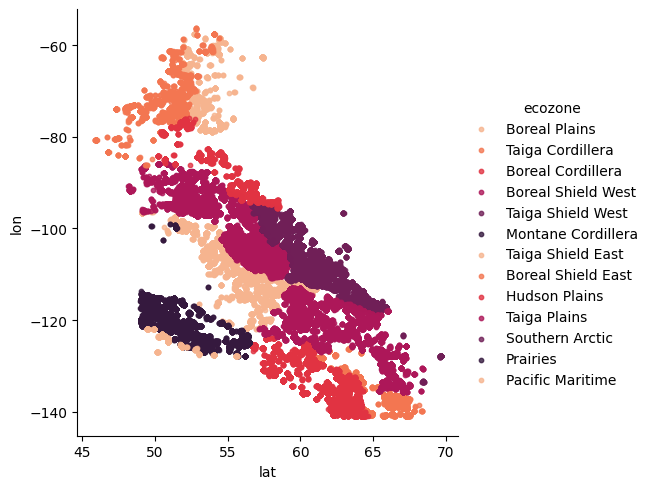

In [94]:
sns.lmplot(x= 'lat',y='lon',
           data=df,
           fit_reg=False,
           hue='ecozone',
           palette=sns.color_palette("rocket_r"),
           scatter_kws={'marker':'D','s':10})

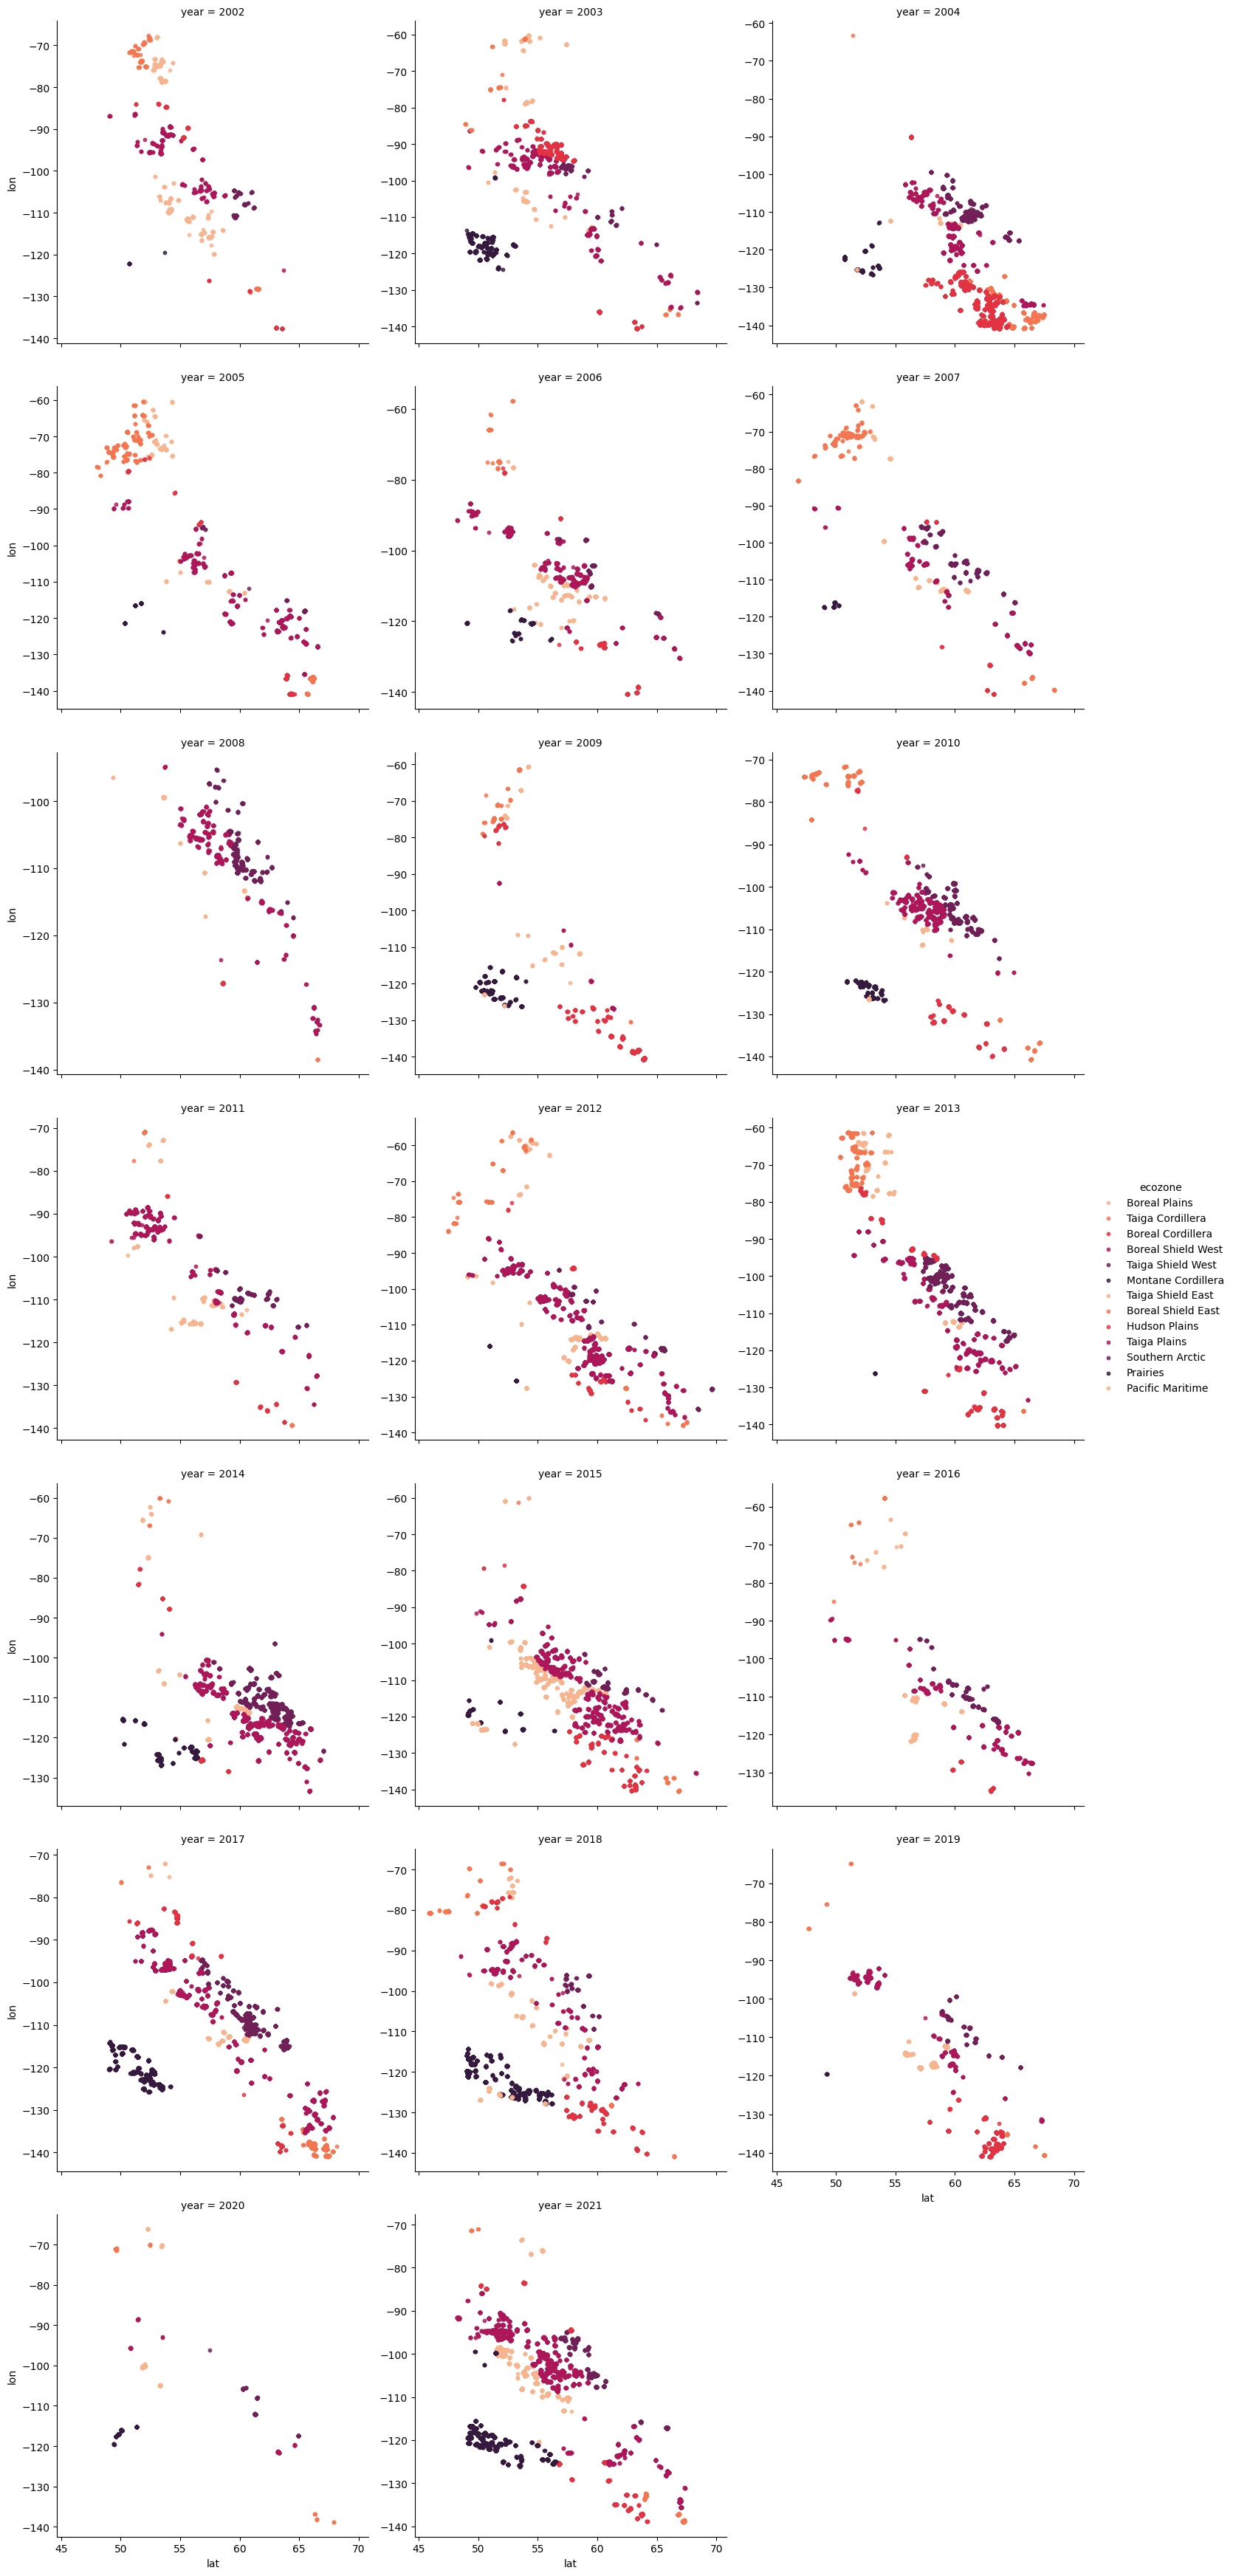

In [95]:
sns.lmplot(x= 'lat',y='lon',
           data=df,
           hue='ecozone',
           fit_reg=False,
           col='year',
           col_wrap=3,
           sharey=False,
           palette=sns.color_palette("rocket_r"),
           scatter_kws={'marker':'D','s':10})

## Analizando datos duplicados y nulos

In [96]:
df.duplicated(subset=df.columns).sum()

np.int64(0)

In [97]:
missing_zero_values_table(df)

Your selected dataframe has 61 columns and 70895 Rows
There are 16 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
fwi_prev2,0,923,1.30,923,1.30,float64
fwi_prev1,0,884,1.20,884,1.20,float64
d_fwi,17,858,1.20,875,1.20,float64
d_bui,17,858,1.20,875,1.20,float64
d_dmc,17,858,1.20,875,1.20,float64
fwi,0,853,1.20,853,1.20,float64
dmc,7,853,1.20,860,1.20,float64
bui,7,853,1.20,860,1.20,float64
d_ffmc,17,763,1.10,780,1.10,float64
dc,0,763,1.10,763,1.10,float64


> No tenemos demasiados nulos, no es necesario hacerle tratamiento por ahorita ya que vamos a agregar las variables

In [98]:
# create_environmental_plot()

In [99]:
# create_topographic_plot()

In [100]:
len(df["ID"].unique())

3269

In [101]:
len(df[df["fwi"].isnull()]['ID'].unique())

84

## Ingeniería de variables

In [102]:
fire_groups = df.groupby('ID')

aggregated_df = pd.DataFrame()

In [103]:
aggregated_df['start_DOB'] = fire_groups['DOB'].first()


In [104]:
def get_season(dob):
    if 0 <= dob <= 59 or 334 < dob <= 366:
        return 'Winter'
    elif 59 < dob <= 151:
        return 'Spring'
    elif 151 < dob <= 243:
        return 'Summer'
    else:  # 243 < dob <= 334
        return 'Fall'

In [105]:
aggregated_df['season'] = aggregated_df['start_DOB'].apply(get_season)

In [106]:
season_dummies = pd.get_dummies(aggregated_df['season'], prefix='season')
aggregated_df = pd.concat([aggregated_df, season_dummies], axis=1)

In [107]:
aggregated_df['year'] = fire_groups['year'].first()

In [108]:
aggregated_df['lon'] = fire_groups['lon'].first()
aggregated_df['lat'] = fire_groups['lat'].first()

In [109]:
# Fire behavior features
aggregated_df['total_area'] = fire_groups['firearea'].sum()
aggregated_df['duration'] = fire_groups.size()
aggregated_df['max_daily_area'] = fire_groups['firearea'].max()
aggregated_df['avg_daily_area'] = fire_groups['firearea'].mean()


In [110]:
# Calculate extreme growth days
def calc_extreme_days(group):
    avg = group['firearea'].mean()
    return (group['firearea'] > 2 * avg).sum() / len(group) * 100
aggregated_df['extreme_growth_pct'] = fire_groups.apply(calc_extreme_days)


In [111]:
# Weather extremes
weather_cols = ['fwi', 'isi', 'dmc', 'dc', 'tmax', 'ws']
for col in weather_cols:
    aggregated_df[f'max_{col}'] = fire_groups[col].max()
aggregated_df['min_rh'] = fire_groups['rh'].min()

# Weather averages
for col in ['fwi', 'tmax', 'rh']:
    aggregated_df[f'avg_{col}'] = fire_groups[col].mean()

# Environmental conditions
env_cols = ['Biomass', 'Closure', 'prcC', 'prcD', 'dem', 'slope', 'twi', 'hydrodens10k']
for col in env_cols:
    aggregated_df[f'avg_{col}'] = fire_groups[col].mean()

In [112]:
# Create composite indices
aggregated_df['fire_intensity_index'] = (
    (aggregated_df['max_daily_area'] / aggregated_df['avg_daily_area']) *
    (aggregated_df['extreme_growth_pct'] / 100)
)

aggregated_df['weather_severity_index'] = (
    (aggregated_df['max_fwi'] / 50) *
    (aggregated_df['max_tmax'] / 35) *
    (1 - aggregated_df['min_rh']/100)
)

aggregated_df['fuel_complexity_index'] = (
    (aggregated_df['avg_Biomass'] / 300) *
    (aggregated_df['avg_Closure'] / 100) *
    (aggregated_df['avg_prcC'] / 100)
)

aggregated_df = aggregated_df.fillna(0)

aggregated_df

,start_DOB,season,season_Fall,season_Spring,season_Summer,season_Winter,year,lon,lat,total_area,duration,max_daily_area,avg_daily_area,extreme_growth_pct,max_fwi,max_isi,max_dmc,max_dc,max_tmax,max_ws,min_rh,avg_fwi,avg_tmax,avg_rh,avg_Biomass,avg_Closure,avg_prcC,avg_prcD,avg_dem,avg_slope,avg_twi,avg_hydrodens10k,fire_intensity_index,weather_severity_index,fuel_complexity_index
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2002_109,175,Summer,False,False,True,False,2002,-116.44,56.82,9833.40,5,7565.40,1966.68,20.00,31.57,11.94,65.28,303.35,28.12,15.91,27.62,25.61,26.04,34.10,101.81,63.76,90.96,9.04,684.28,1.30,5.84,0.05,0.77,0.37,0.20
2002_11,167,Summer,False,False,True,False,2002,-128.96,60.89,6097.68,7,3625.56,871.10,14.29,8.40,4.47,21.31,86.53,16.64,17.88,35.18,3.83,13.42,44.67,68.19,48.73,96.01,3.99,1113.00,9.98,5.87,0.01,0.59,0.05,0.11
2002_116,176,Summer,False,False,True,False,2002,-114.81,56.99,8505.00,3,5916.24,2835.00,33.33,37.25,14.09,72.96,333.29,28.88,15.53,27.55,31.49,26.56,32.07,90.97,57.68,80.98,19.02,573.99,1.49,5.80,0.05,0.70,0.45,0.14
2002_130,175,Summer,False,False,True,False,2002,-115.08,56.76,3943.08,17,2592.00,231.95,11.76,32.68,12.28,79.56,408.85,29.49,16.30,26.08,17.56,22.19,44.77,125.45,69.09,79.90,20.10,546.52,1.66,5.90,0.01,1.31,0.41,0.23
2002_131,194,Summer,False,False,True,False,2002,-109.60,57.58,1584.36,1,1584.36,1584.36,0.00,4.62,1.96,25.62,141.39,28.03,8.37,47.39,4.62,28.03,47.39,16.98,55.91,98.43,1.57,535.43,2.05,5.62,0.08,0.00,0.04,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021_5,190,Summer,False,False,True,False,2021,-107.45,60.52,2916.00,29,984.96,100.55,13.79,26.07,12.70,42.68,267.10,29.35,17.39,31.22,9.31,20.64,50.00,25.28,40.44,98.51,1.49,477.36,2.00,5.51,0.13,1.35,0.30,0.03
2021_6,190,Summer,False,False,True,False,2021,-106.40,60.67,1179.36,17,469.80,69.37,23.53,17.10,9.39,23.65,169.97,28.57,16.69,33.67,4.18,20.52,53.06,21.61,37.15,97.10,2.90,447.06,1.48,5.74,0.40,1.59,0.19,0.03
2021_65,181,Summer,False,False,True,False,2021,-104.63,59.63,25061.40,39,4053.24,642.60,17.95,18.10,9.74,36.31,247.91,35.79,18.41,36.41,7.10,22.27,53.78,21.26,37.35,88.32,11.68,418.44,2.82,5.42,0.30,1.13,0.24,0.02


In [113]:
seasonal_features = ['season_Winter', 'season_Spring', 'season_Summer', 'season_Fall']
for season in ['Winter', 'Spring', 'Summer', 'Fall']:
    aggregated_df[f'season_{season}_weather'] = (
        aggregated_df[f'season_{season}'] *
        aggregated_df['weather_severity_index']
    )

In [114]:
aggregated_df['fuel_moisture_index'] = (
    aggregated_df['avg_Biomass'] * (1 - aggregated_df['min_rh']/100)
)

In [115]:
fire_features = [
    'fire_intensity_index',    # Our composite index of fire intensity
    'max_daily_area',          # Maximum area burned in a single day
    'avg_daily_area',          # Average daily area burned
    'extreme_growth_pct'       # Percentage of days with extreme growth
]

# Weather condition features
weather_features = [
    'weather_severity_index',  # Our composite weather risk index
    'max_fwi',                # Maximum Fire Weather Index
    'max_isi',                # Maximum Initial Spread Index
    'max_dmc',                # Maximum Duff Moisture Code
    'max_tmax',               # Maximum temperature
    'min_rh',                 # Minimum relative humidity
    'max_ws'                  # Maximum wind speed
]

# Fuel and terrain features
environmental_features = [
    'fuel_complexity_index',   # Our composite fuel index
    'avg_Biomass',            # Average biomass
    'avg_Closure',            # Average crown closure
    'avg_prcC',               # Average conifer percentage
    'avg_dem',                # Average elevation
    'avg_slope',              # Average slope
    'avg_twi',                # Average topographic wetness index
    'avg_hydrodens10k'
]

In [116]:
feature_columns =  seasonal_features + ['season_Winter_weather', 'season_Spring_weather',
         'season_Summer_weather', 'season_Fall_weather'] + fire_features + weather_features + environmental_features

### Preprocesamiento

In [117]:
feature_columns

['season_Winter',
 'season_Spring',
 'season_Summer',
 'season_Fall',
 'season_Winter_weather',
 'season_Spring_weather',
 'season_Summer_weather',
 'season_Fall_weather',
 'fire_intensity_index',
 'max_daily_area',
 'avg_daily_area',
 'extreme_growth_pct',
 'weather_severity_index',
 'max_fwi',
 'max_isi',
 'max_dmc',
 'max_tmax',
 'min_rh',
 'max_ws',
 'fuel_complexity_index',
 'avg_Biomass',
 'avg_Closure',
 'avg_prcC',
 'avg_dem',
 'avg_slope',
 'avg_twi',
 'avg_hydrodens10k']

In [118]:
aggregated_df

,start_DOB,season,season_Fall,season_Spring,season_Summer,season_Winter,year,lon,lat,total_area,duration,max_daily_area,avg_daily_area,extreme_growth_pct,max_fwi,max_isi,max_dmc,max_dc,max_tmax,max_ws,min_rh,avg_fwi,avg_tmax,avg_rh,avg_Biomass,avg_Closure,avg_prcC,avg_prcD,avg_dem,avg_slope,avg_twi,avg_hydrodens10k,fire_intensity_index,weather_severity_index,fuel_complexity_index,season_Winter_weather,season_Spring_weather,season_Summer_weather,season_Fall_weather,fuel_moisture_index
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2002_109,175,Summer,False,False,True,False,2002,-116.44,56.82,9833.40,5,7565.40,1966.68,20.00,31.57,11.94,65.28,303.35,28.12,15.91,27.62,25.61,26.04,34.10,101.81,63.76,90.96,9.04,684.28,1.30,5.84,0.05,0.77,0.37,0.20,0.00,0.00,0.37,0.00,73.70
2002_11,167,Summer,False,False,True,False,2002,-128.96,60.89,6097.68,7,3625.56,871.10,14.29,8.40,4.47,21.31,86.53,16.64,17.88,35.18,3.83,13.42,44.67,68.19,48.73,96.01,3.99,1113.00,9.98,5.87,0.01,0.59,0.05,0.11,0.00,0.00,0.05,0.00,44.20
2002_116,176,Summer,False,False,True,False,2002,-114.81,56.99,8505.00,3,5916.24,2835.00,33.33,37.25,14.09,72.96,333.29,28.88,15.53,27.55,31.49,26.56,32.07,90.97,57.68,80.98,19.02,573.99,1.49,5.80,0.05,0.70,0.45,0.14,0.00,0.00,0.45,0.00,65.91
2002_130,175,Summer,False,False,True,False,2002,-115.08,56.76,3943.08,17,2592.00,231.95,11.76,32.68,12.28,79.56,408.85,29.49,16.30,26.08,17.56,22.19,44.77,125.45,69.09,79.90,20.10,546.52,1.66,5.90,0.01,1.31,0.41,0.23,0.00,0.00,0.41,0.00,92.73
2002_131,194,Summer,False,False,True,False,2002,-109.60,57.58,1584.36,1,1584.36,1584.36,0.00,4.62,1.96,25.62,141.39,28.03,8.37,47.39,4.62,28.03,47.39,16.98,55.91,98.43,1.57,535.43,2.05,5.62,0.08,0.00,0.04,0.03,0.00,0.00,0.04,0.00,8.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021_5,190,Summer,False,False,True,False,2021,-107.45,60.52,2916.00,29,984.96,100.55,13.79,26.07,12.70,42.68,267.10,29.35,17.39,31.22,9.31,20.64,50.00,25.28,40.44,98.51,1.49,477.36,2.00,5.51,0.13,1.35,0.30,0.03,0.00,0.00,0.30,0.00,17.39
2021_6,190,Summer,False,False,True,False,2021,-106.40,60.67,1179.36,17,469.80,69.37,23.53,17.10,9.39,23.65,169.97,28.57,16.69,33.67,4.18,20.52,53.06,21.61,37.15,97.10,2.90,447.06,1.48,5.74,0.40,1.59,0.19,0.03,0.00,0.00,0.19,0.00,14.33
2021_65,181,Summer,False,False,True,False,2021,-104.63,59.63,25061.40,39,4053.24,642.60,17.95,18.10,9.74,36.31,247.91,35.79,18.41,36.41,7.10,22.27,53.78,21.26,37.35,88.32,11.68,418.44,2.82,5.42,0.30,1.13,0.24,0.02,0.00,0.00,0.24,0.00,13.52


In [119]:
aggregated_df.to_csv("aggregated_data.csv")

In [120]:
aggregated_df.columns

Index(['start_DOB', 'season', 'season_Fall', 'season_Spring', 'season_Summer',
       'season_Winter', 'year', 'lon', 'lat', 'total_area', 'duration',
       'max_daily_area', 'avg_daily_area', 'extreme_growth_pct', 'max_fwi',
       'max_isi', 'max_dmc', 'max_dc', 'max_tmax', 'max_ws', 'min_rh',
       'avg_fwi', 'avg_tmax', 'avg_rh', 'avg_Biomass', 'avg_Closure',
       'avg_prcC', 'avg_prcD', 'avg_dem', 'avg_slope', 'avg_twi',
       'avg_hydrodens10k', 'fire_intensity_index', 'weather_severity_index',
       'fuel_complexity_index', 'season_Winter_weather',
       'season_Spring_weather', 'season_Summer_weather', 'season_Fall_weather',
       'fuel_moisture_index'],
      dtype='object')

In [121]:
scaler = StandardScaler()

In [122]:
X = aggregated_df[feature_columns]

In [123]:
X.head()

,season_Winter,season_Spring,season_Summer,season_Fall,season_Winter_weather,season_Spring_weather,season_Summer_weather,season_Fall_weather,fire_intensity_index,max_daily_area,avg_daily_area,extreme_growth_pct,weather_severity_index,max_fwi,max_isi,max_dmc,max_tmax,min_rh,max_ws,fuel_complexity_index,avg_Biomass,avg_Closure,avg_prcC,avg_dem,avg_slope,avg_twi,avg_hydrodens10k
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,
2002_109,False,False,True,False,0.00,0.00,0.37,0.00,0.77,7565.40,1966.68,20.00,0.37,31.57,11.94,65.28,28.12,27.62,15.91,0.20,101.81,63.76,90.96,684.28,1.30,5.84,0.05
2002_11,False,False,True,False,0.00,0.00,0.05,0.00,0.59,3625.56,871.10,14.29,0.05,8.40,4.47,21.31,16.64,35.18,17.88,0.11,68.19,48.73,96.01,1113.00,9.98,5.87,0.01
2002_116,False,False,True,False,0.00,0.00,0.45,0.00,0.70,5916.24,2835.00,33.33,0.45,37.25,14.09,72.96,28.88,27.55,15.53,0.14,90.97,57.68,80.98,573.99,1.49,5.80,0.05
2002_130,False,False,True,False,0.00,0.00,0.41,0.00,1.31,2592.00,231.95,11.76,0.41,32.68,12.28,79.56,29.49,26.08,16.30,0.23,125.45,69.09,79.90,546.52,1.66,5.90,0.01
2002_131,False,False,True,False,0.00,0.00,0.04,0.00,0.00,1584.36,1584.36,0.00,0.04,4.62,1.96,25.62,28.03,47.39,8.37,0.03,16.98,55.91,98.43,535.43,2.05,5.62,0.08


In [124]:
area_score = aggregated_df['total_area'].rank(pct=True)
intensity_score = aggregated_df['max_daily_area'].rank(pct=True)
growth_score = aggregated_df['extreme_growth_pct'].rank(pct=True)
duration_score = aggregated_df['duration'].rank(pct=True)
env_risk = (
    aggregated_df['avg_Biomass'] * aggregated_df['avg_prcC'] *
    (1 - aggregated_df['avg_hydrodens10k'])
).rank(pct=True)

# Create weighted composite risk score
risk_score = (
    0.35 * area_score +      # Total area
    0.25 * intensity_score + # Peak intensity
    # 0.20 * spread_score +    # Spread rate
    0.15 * env_risk +        # Environmental conditions
    0.05 * duration_score    # Duration
)

# Convert to risk levels using quantile-based thresholds
y = pd.qcut(
    risk_score,
    q=3,
    labels=['Low', 'Medium', 'High']
)
y

ID
2002_109      High
2002_11       High
2002_116      High
2002_130      High
2002_131       Low
             ...  
2021_5      Medium
2021_6         Low
2021_65       High
2021_7      Medium
2021_9      Medium
Length: 3269, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [125]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [126]:
# Define hyperparameter grid
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [10, 20, 30, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation
rf = RandomForestClassifier(random_state=42)

In [127]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step to scale features
    ('classifier', rf)  # Replace with your estimator
])

In [128]:
grid_search = GridSearchCV(
    pipeline, param_grid, cv=5,
    scoring='f1_weighted', n_jobs=-1
)


In [129]:
grid_search.fit(X_train, y_train)

# Get best model
model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

Best parameters: {'classifier__max_depth': 30, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}


In [130]:
with open('kauil_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [131]:
def plot_evaluation_results(X_test, y_test):
    """
    Create comprehensive visualizations of model performance.
    """

    classifier = model.named_steps['classifier']
    fig, axes = plt.subplots(2, 2, figsize=(15, 15))

    # 1. Confusion Matrix
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[0,0])
    axes[0,0].set_title('Confusion Matrix')

    # 2. Feature Importance
    feature_importance = pd.Series(
        classifier.feature_importances_,
        index=feature_columns
    ).sort_values(ascending=False)

    feature_importance.head(10).plot(kind='bar', ax=axes[0,1])
    axes[0,1].set_title('Top 10 Most Important Features')

    # 3. Prediction Probability Distribution
    probabilities = model.predict_proba(X_test)
    for i, class_label in enumerate(classifier.classes_):
        sns.kdeplot(
            probabilities[:, i],
            ax=axes[1,0],
            label=f'Class {class_label}'
        )
    axes[1,0].set_title('Prediction Probability Distribution')

    # 4. Cross-validation Scores
    cv_scores = cross_val_score(
        model, X_test, y_test, cv=5, scoring='f1_weighted'
    )
    axes[1,1].boxplot(cv_scores)
    axes[1,1].set_title('Cross-validation Scores')

    plt.tight_layout()
    plt.show()

In [132]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print("\nModel Performance:")
print(f"Training accuracy: {train_score:.3f}")
print(f"Testing accuracy: {test_score:.3f}")


Model Performance:
Training accuracy: 0.971
Testing accuracy: 0.841


In [133]:
# Detailed classification report
y_pred = model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

        High       0.91      0.88      0.90       218
         Low       0.87      0.85      0.86       218
      Medium       0.75      0.79      0.77       218

    accuracy                           0.84       654
   macro avg       0.84      0.84      0.84       654
weighted avg       0.84      0.84      0.84       654



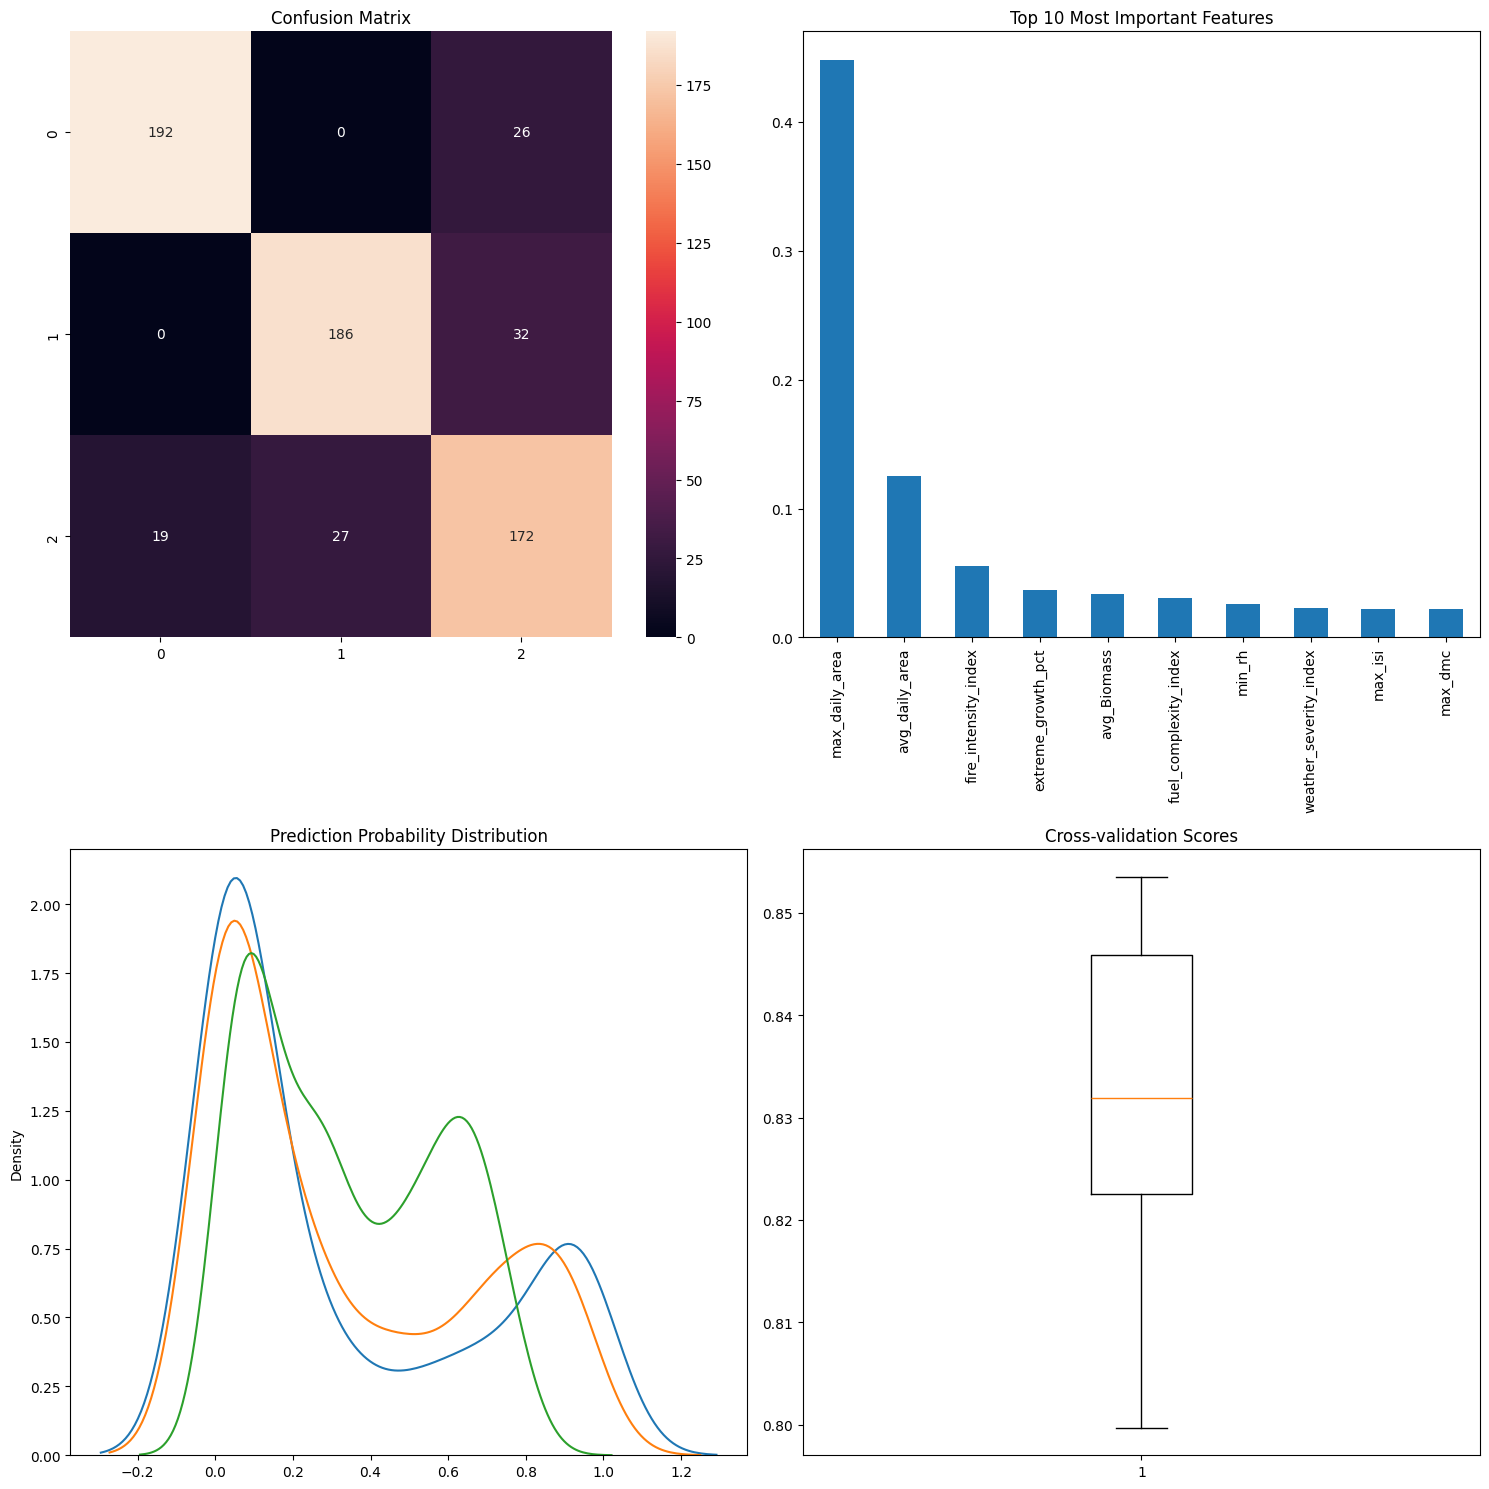

In [134]:
# Create visualizations
plot_evaluation_results(X_test, y_test)

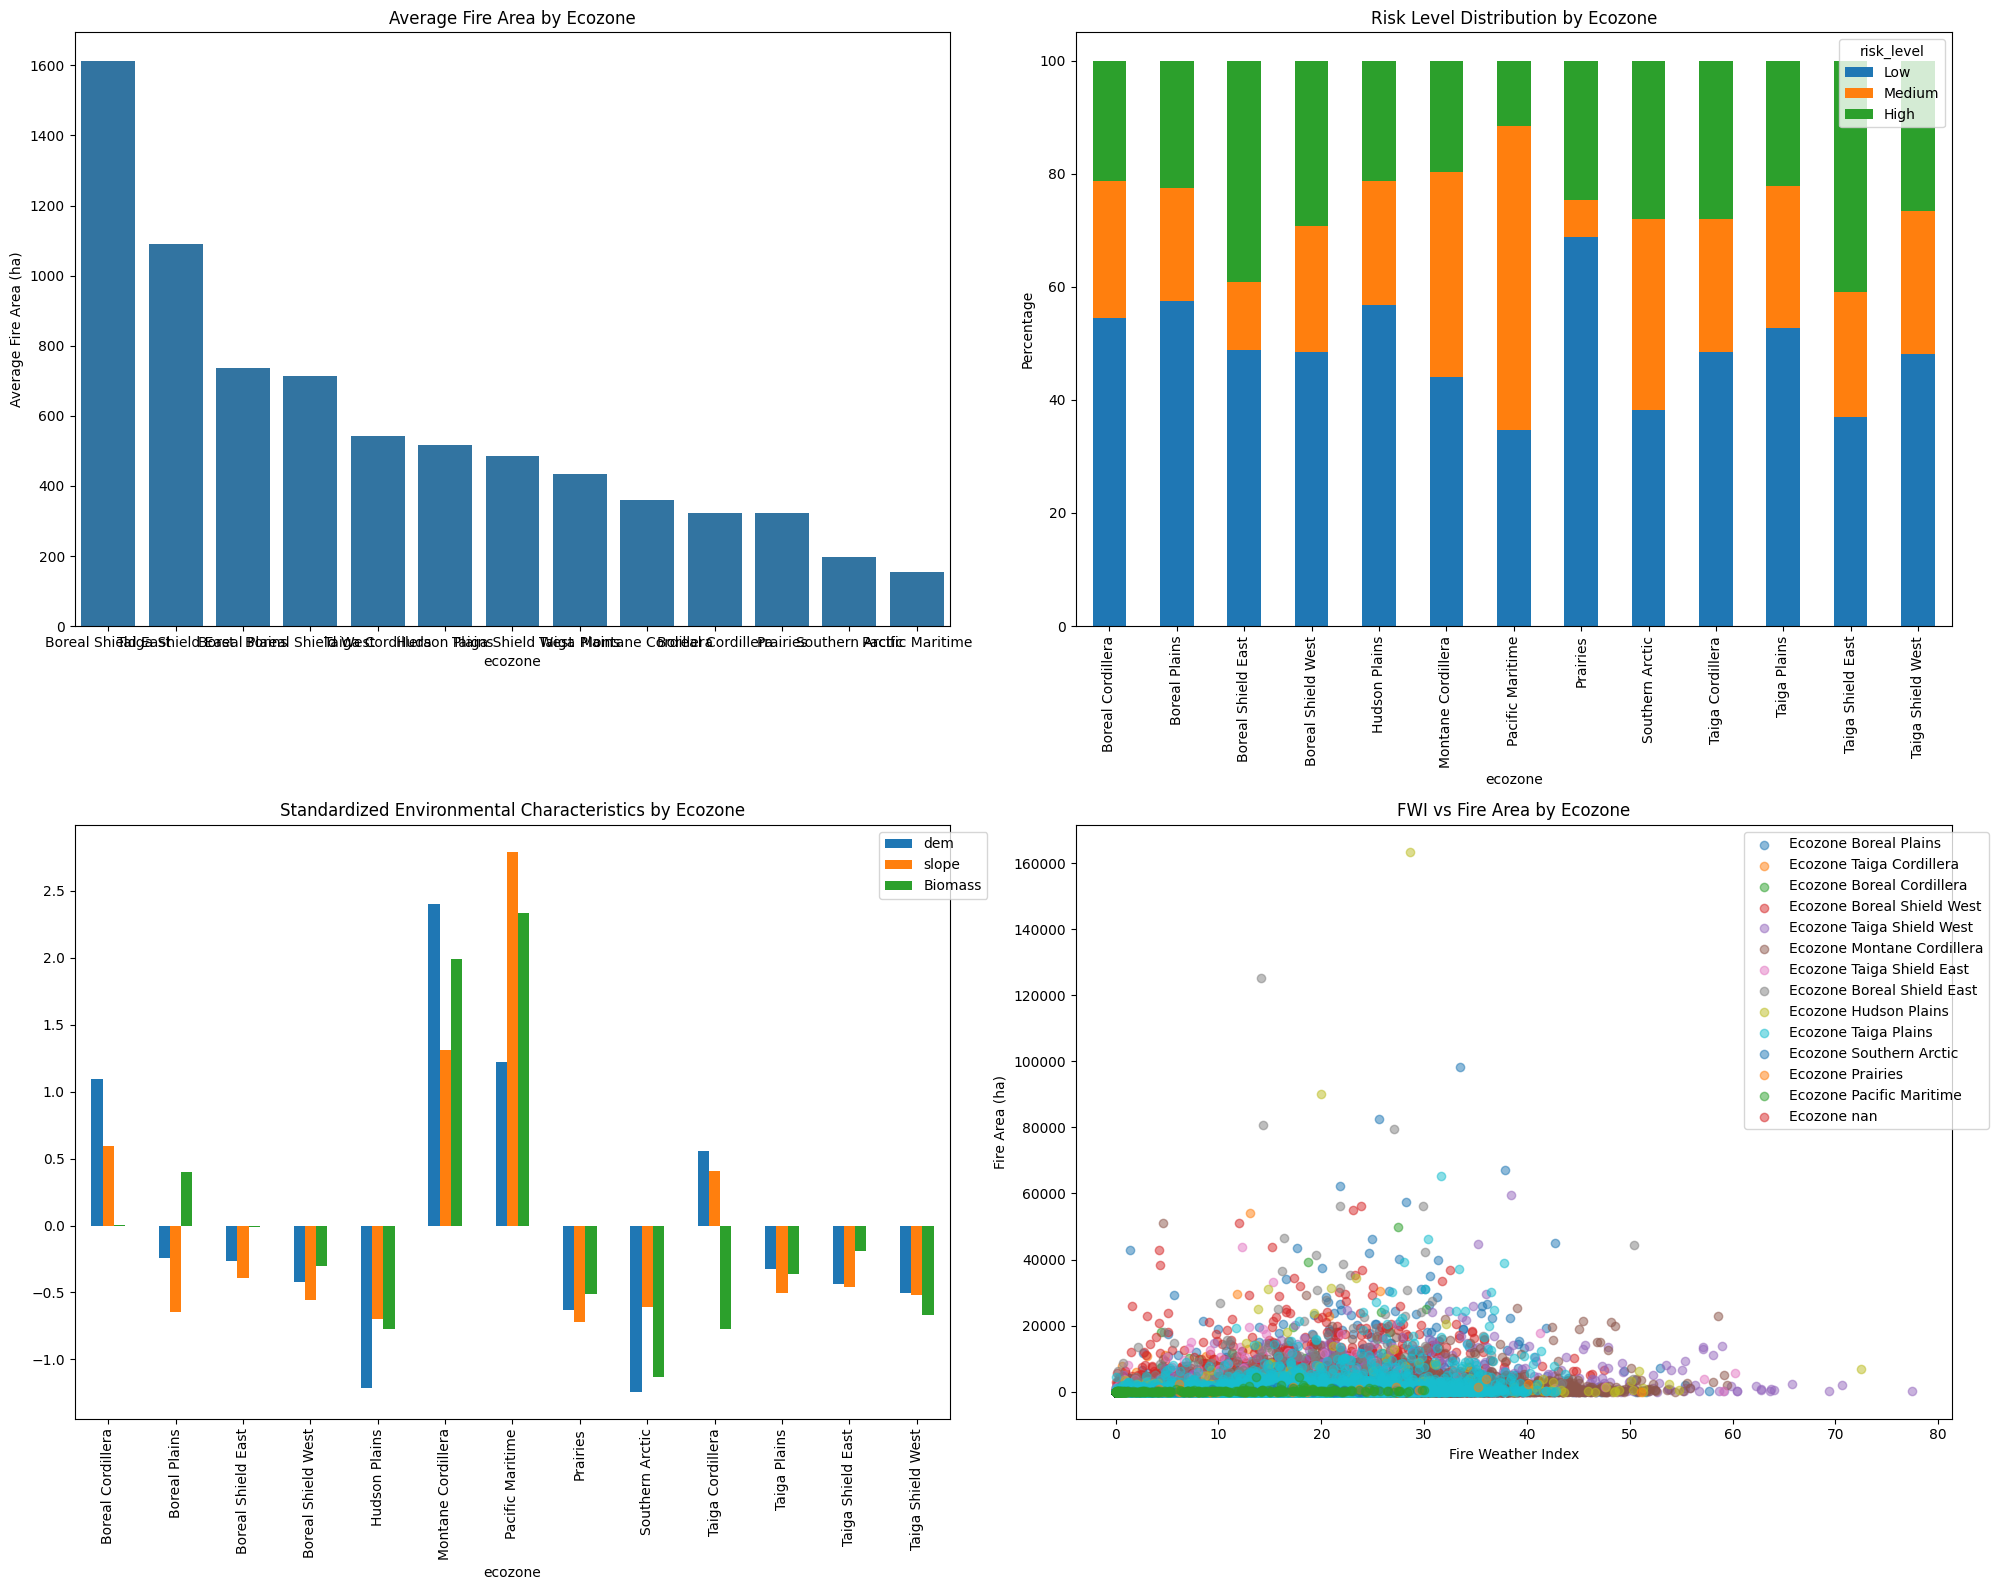

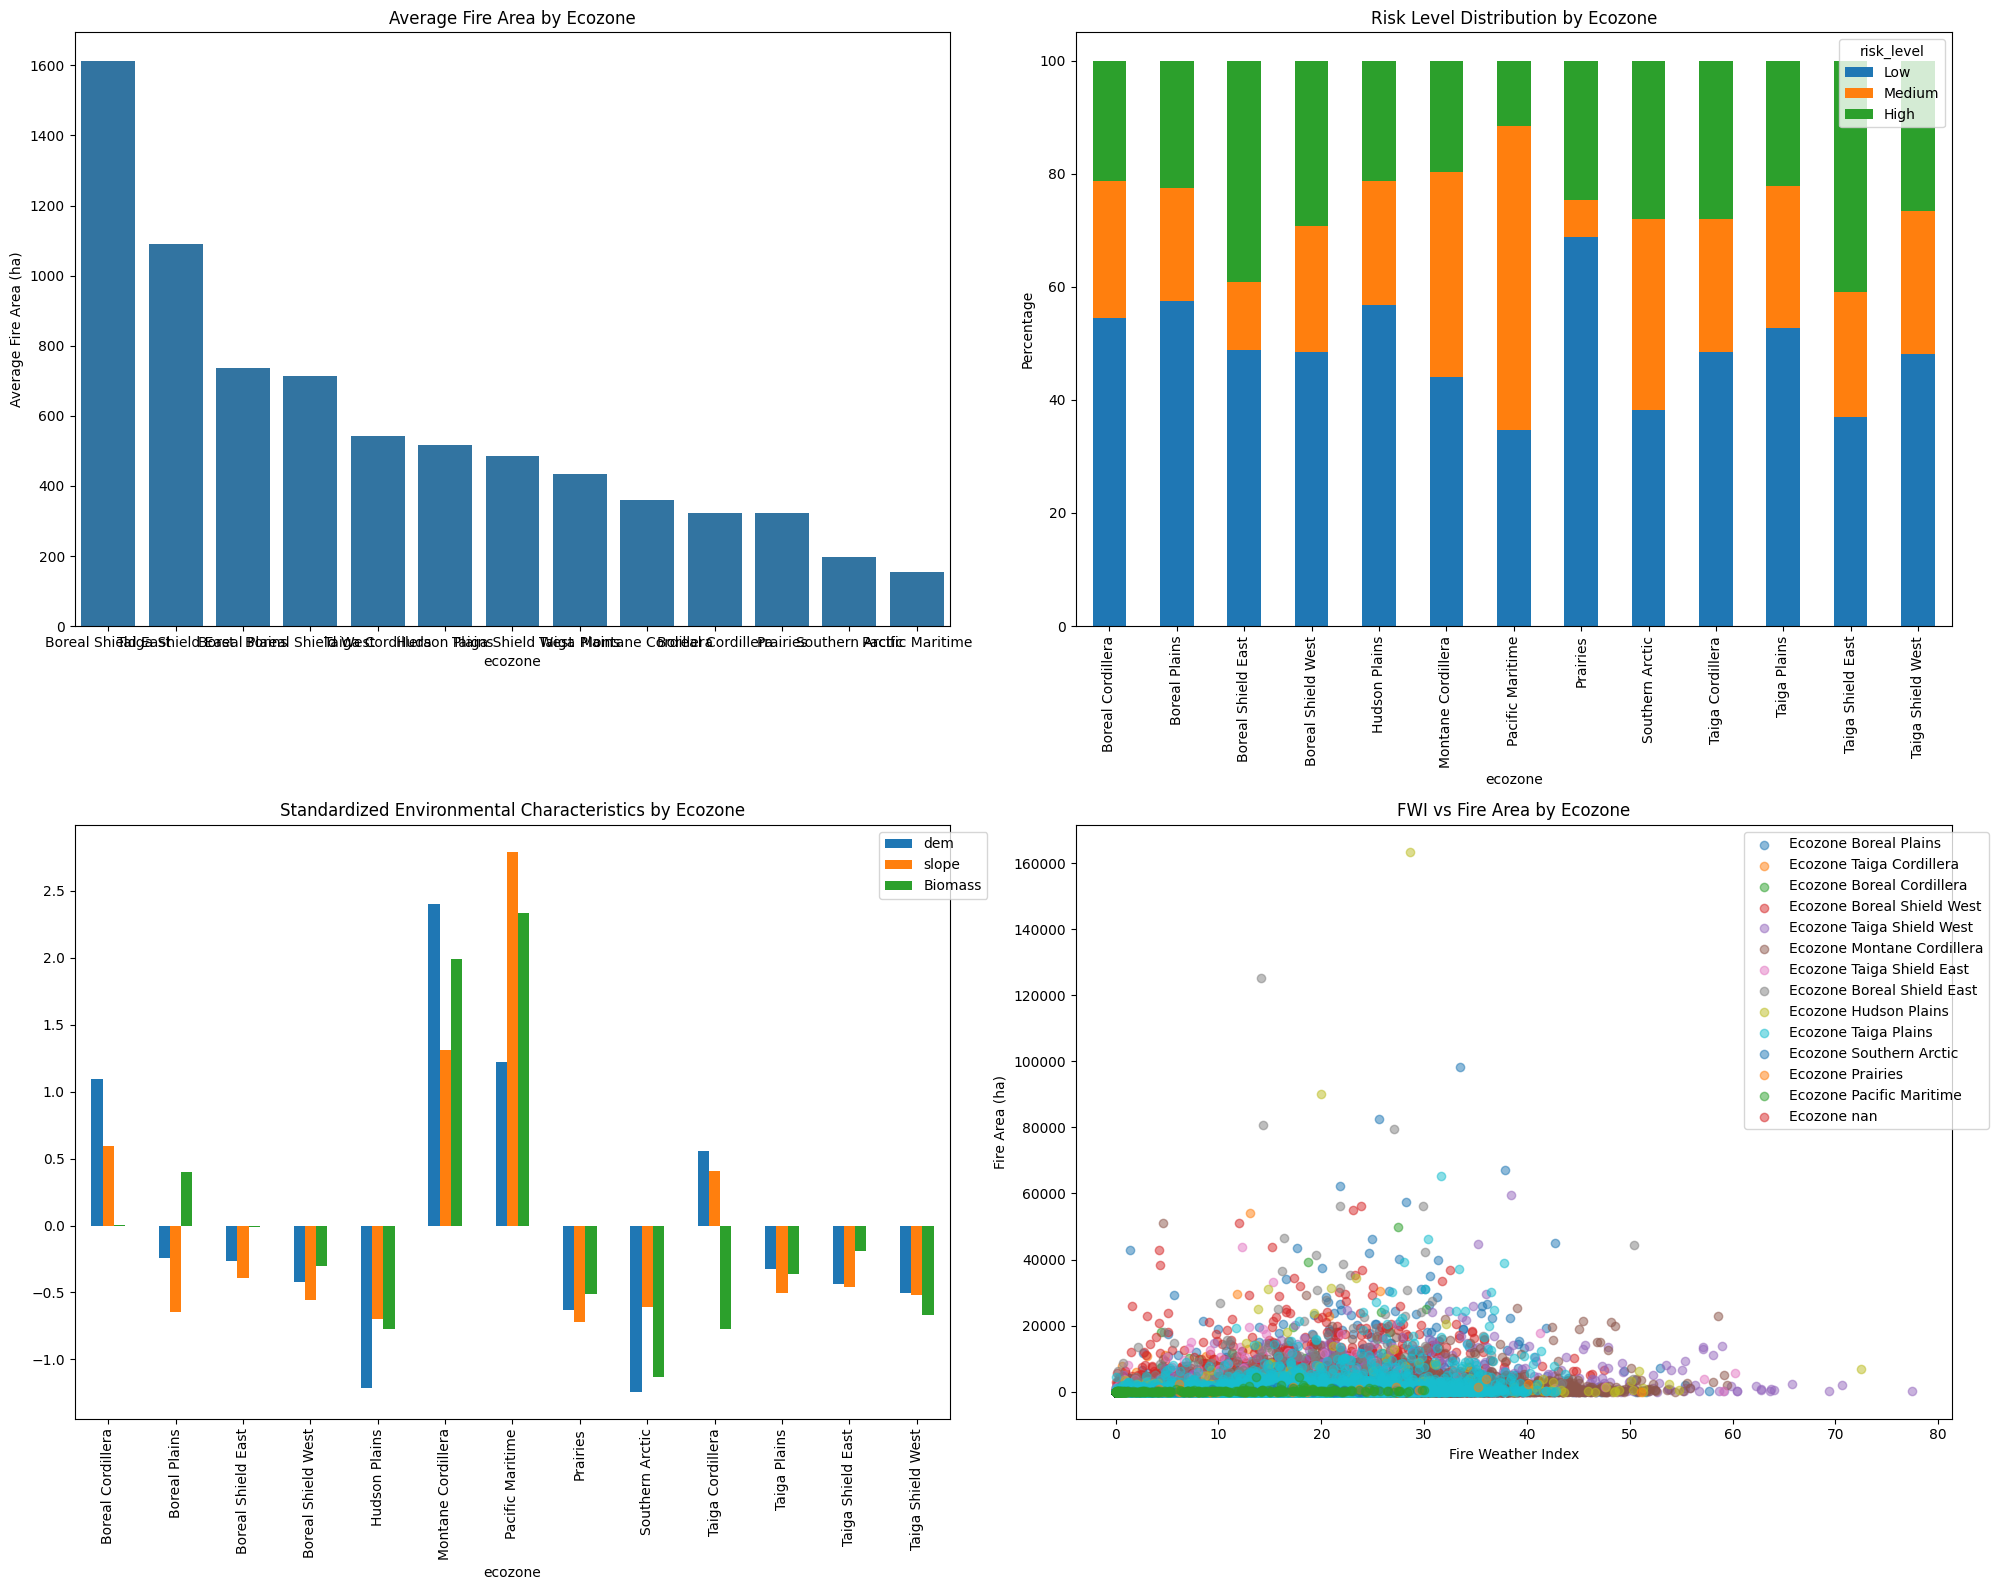

In [135]:
plot_ecozone_patterns(df)

## Prueba de modelo

In [137]:
from datetime import datetime


def prepare_test_data(longitude, latitude, fire_date):
    """
    Prepare test data from geographical coordinates and date.
    """

    aggregated_data = pd.read_csv("aggregated_data.csv")

    # Define feature columns in the same order as training
    feature_columns = [
        "season_Winter",
        "season_Spring",
        "season_Summer",
        "season_Fall",
        "season_Winter_weather",
        "season_Spring_weather",
        "season_Summer_weather",
        "season_Fall_weather",
        "fire_intensity_index",
        "max_daily_area",
        "avg_daily_area",
        "extreme_growth_pct",
        "weather_severity_index",
        "max_fwi",
        "max_isi",
        "max_dmc",
        "max_tmax",
        "min_rh",
        "max_ws",
        "fuel_complexity_index",
        "avg_Biomass",
        "avg_Closure",
        "avg_prcC",
        "avg_dem",
        "avg_slope",
        "avg_twi",
        "avg_hydrodens10k",
    ]

    # Convert date to day of year
    date = datetime.strptime(fire_date, "%Y-%m-%d")
    dob = date.timetuple().tm_yday

    # Find the closest historical record
    aggregated_data["distance"] = np.sqrt(
        (aggregated_data["lon"] - float(longitude)) ** 2
        + (aggregated_data["lat"] - float(latitude)) ** 2
    )

    # Find the closest record
    similar_record = aggregated_data.loc[aggregated_data["distance"].idxmin()]

    print(similar_record)
    # Return the features needed for prediction
    return similar_record[feature_columns]

In [138]:
aggregated_df[aggregated_df.index == "2021_65"]

,start_DOB,season,season_Fall,season_Spring,season_Summer,season_Winter,year,lon,lat,total_area,duration,max_daily_area,avg_daily_area,extreme_growth_pct,max_fwi,max_isi,max_dmc,max_dc,max_tmax,max_ws,min_rh,avg_fwi,avg_tmax,avg_rh,avg_Biomass,avg_Closure,avg_prcC,avg_prcD,avg_dem,avg_slope,avg_twi,avg_hydrodens10k,fire_intensity_index,weather_severity_index,fuel_complexity_index,season_Winter_weather,season_Spring_weather,season_Summer_weather,season_Fall_weather,fuel_moisture_index
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021_65,181,Summer,False,False,True,False,2021,-104.63,59.63,25061.40,39,4053.24,642.60,17.95,18.10,9.74,36.31,247.91,35.79,18.41,36.41,7.10,22.27,53.78,21.26,37.35,88.32,11.68,418.44,2.82,5.42,0.30,1.13,0.24,0.02,0.00,0.00,0.24,0.00,13.52


In [139]:
y[y == "High"]

ID
2002_109    High
2002_11     High
2002_116    High
2002_130    High
2002_132    High
            ... 
2021_300    High
2021_31     High
2021_33     High
2021_41     High
2021_65     High
Length: 1090, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [140]:
test_data = prepare_test_data("61.70014239017229", "-108.81961107224643", "2024-07-19")

ID                        2012_296
start_DOB                      172
season                      Summer
season_Fall                  False
season_Spring                False
season_Summer                 True
season_Winter                False
year                          2012
lon                         -56.37
lat                          52.85
total_area                 2248.56
duration                         6
max_daily_area             1010.88
avg_daily_area              374.76
extreme_growth_pct           16.67
max_fwi                      19.69
max_isi                       8.24
max_dmc                      54.69
max_dc                      214.73
max_tmax                     30.17
max_ws                       13.43
min_rh                       37.14
avg_fwi                      16.20
avg_tmax                     24.23
avg_rh                       51.33
avg_Biomass                  60.78
avg_Closure                  39.98
avg_prcC                     95.59
avg_prcD            

In [141]:
test_data

season_Winter              False
season_Spring              False
season_Summer               True
season_Fall                False
season_Winter_weather       0.00
season_Spring_weather       0.00
season_Summer_weather       0.21
season_Fall_weather         0.00
fire_intensity_index        0.45
max_daily_area           1010.88
avg_daily_area            374.76
extreme_growth_pct         16.67
weather_severity_index      0.21
max_fwi                    19.69
max_isi                     8.24
max_dmc                    54.69
max_tmax                   30.17
min_rh                     37.14
max_ws                     13.43
fuel_complexity_index       0.08
avg_Biomass                60.78
avg_Closure                39.98
avg_prcC                   95.59
avg_dem                   222.16
avg_slope                   6.86
avg_twi                     5.27
avg_hydrodens10k            0.10
Name: 1521, dtype: object

In [142]:


with open("kauil_model.pkl", 'rb') as file:
    pipeline = pickle.load(file)

"""Make predictions using the loaded pipeline."""
# Ensure data is in correct format
if isinstance(test_data, pd.Series):
    test_data = pd.DataFrame([test_data])

# Make prediction using the pipeline
risk_level = pipeline.predict(test_data)
risk_probabilities = pipeline.predict_proba(test_data)

dict = {
    'predicted_risk_level': risk_level[0],
    'probability_distribution': {
        'Low': risk_probabilities[0][0],
        'Medium': risk_probabilities[0][1],
        'High': risk_probabilities[0][2]
    },
    'confidence': max(risk_probabilities[0])
}
dict

{'predicted_risk_level': 'Medium',
 'probability_distribution': {'Low': np.float64(0.04164790764790765),
  'Medium': np.float64(0.28841072816072816),
  'High': np.float64(0.6699413641913641)},
 'confidence': np.float64(0.6699413641913641)}